In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#get data
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Processed_Dataset.zip","r") as zip_ref:
    zip_ref.extractall("/content/sample_data/Processed_Dataset")

In [ ]:
#get test data
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/test_data.zip","r") as zip_ref:
    zip_ref.extractall("/content/sample_data/test_data")

In [ ]:
#import
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import numpy 
from numpy import save
from sklearn.preprocessing import LabelBinarizer
from torch.utils.tensorboard import SummaryWriter
torch.set_printoptions(linewidth=120)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#datatransformer
data_trnsform=transforms.Compose([ transforms.Resize([224,224]),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [ ]:
#load model
model= torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
#delete the last layer 
newmodel = torch.nn.Sequential(*(list(model.children())[:-1]))

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [ ]:
#model example
img = Image.open("/content/sample_data/Processed_Dataset/Processed Dataset/without_mask/maksssksksss104_0.png").convert('RGB')
img.show()
img_t = data_trnsform(img)
batch_t = torch.unsqueeze(img_t, 0)
#check standart model
model.eval()
out=model(batch_t)
print(out.shape)
#check new model
newmodel.eval()
out=newmodel(batch_t)
print(out.shape)
a=out.squeeze().tolist()
print(a)

torch.Size([1, 1000])
torch.Size([1, 1024, 1, 1])
[0.9345547556877136, 0.0, 1.4289844036102295, 0.016290880739688873, 0.6749197244644165, 0.10992732644081116, 0.32185888290405273, 0.01027659047394991, 0.3303859829902649, 0.13104033470153809, 0.17084845900535583, 0.06410875171422958, 0.47332510352134705, 0.16930390894412994, 0.40690508484840393, 0.14361536502838135, 0.18433018028736115, 0.48698756098747253, 0.08759234845638275, 0.06302911788225174, 0.3865075707435608, 0.3519982695579529, 0.26336830854415894, 0.6703549027442932, 0.06119119003415108, 0.12429752945899963, 0.0833682119846344, 0.06798401474952698, 0.0021518042776733637, 0.2807943522930145, 0.43372786045074463, 1.2501072883605957, 0.5239195823669434, 0.09981454163789749, 0.020385200157761574, 0.030726438388228416, 0.07274974137544632, 0.013547960668802261, 0.06029800325632095, 0.11881951242685318, 0.0301414355635643, 1.6241265535354614, 0.2519024610519409, 0.9682189226150513, 0.08346302807331085, 0.03270087391138077, 0.050034

In [ ]:
#get matrix and label vector
directory="/content/sample_data/Processed_Dataset/Processed Dataset/"
subfolders = [ f.path for f in os.scandir(directory) if f.is_dir() ]
subfolders =[os.path.relpath(x, directory) for x in subfolders ]
labels=[]
listOfOutputs=[]
for i in subfolders:
  label=i
  for x in os.listdir(os.path.join(directory, i)):
    labels.append(label)
    img = Image.open(os.path.join(directory, i,x)).convert('RGB')
    img_t = data_trnsform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out=newmodel(batch_t)
    list_out=out.squeeze().tolist()
    listOfOutputs.append(list_out)
  print(len(listOfOutputs))
  print(len(labels))


3231
3231
3948
3948
4071
4071


In [ ]:
# covert to np format
X = numpy.array([numpy.array(xi) for xi in listOfOutputs])
y = np.array(labels)
#y_dense = LabelBinarizer().fit_transform(y)

In [ ]:
#save tensor 
save('X.npy', X)
save('y.npy',y)

In [ ]:
#get matrix and label vector for test data
directory="/content/sample_data/test_data/test_data"
subfolders = [ f.path for f in os.scandir(directory) if f.is_dir() ]
subfolders =[os.path.relpath(x, directory) for x in subfolders ]
labels=[]
listOfOutputs=[]
for i in subfolders:
  label=i
  for x in os.listdir(os.path.join(directory, i)):
    labels.append(label)
    img = Image.open(os.path.join(directory, i,x)).convert('RGB')
    img_t = data_trnsform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out=newmodel(batch_t)
    list_out=out.squeeze().tolist()
    listOfOutputs.append(list_out)
  print(len(listOfOutputs))
  print(len(labels))

24
24
44
44
65
65


In [ ]:
# covert to np format
X_test = numpy.array([numpy.array(xi) for xi in listOfOutputs])
y_test = np.array(labels)
#y_dense_test = LabelBinarizer().fit_transform(y_test)
#save tensor 
save('X_test.npy', X_test)
save('y_test.npy',y_test)

In [ ]:
#load data 
X_test=numpy.load("/content/drive/MyDrive/X_test.npy")
X=numpy.load("/content/drive/MyDrive/X.npy")
y_test=numpy.load("/content/drive/MyDrive/y_test.npy")
y=numpy.load("/content/drive/MyDrive/y.npy")

In [ ]:
#put tensor to SVM 
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

class_names=['mask_weared_incorrect', 'with_mask', 'without_mask']

rbf = svm.SVC(kernel='rbf',cache_size=1000,max_iter=100000).fit(X, y)
poly = svm.SVC(kernel='poly', degree=2,cache_size=1000,max_iter=100000).fit(X, y)
lin=svm.LinearSVC(max_iter=100000).fit(X, y)

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
lin_pred = lin.predict(X_test)




Accuracy (Polynomial Kernel):  69.23
F1 (Polynomial Kernel):  64.32


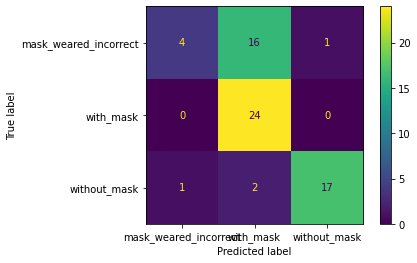

Accuracy (RBF Kernel):  69.23
F1 (RBF Kernel):  62.62


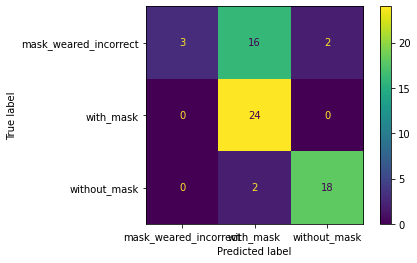

Accuracy (Lin Kernel):  64.62
F1 (Lin Kernel):  60.95


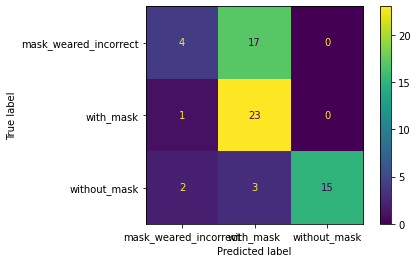

In [ ]:
#metrics
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
cm = confusion_matrix(y_test, poly_pred, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
cm = confusion_matrix(y_test, rbf_pred, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

lin_accuracy = accuracy_score(y_test, lin_pred)
lin_f1 = f1_score(y_test, lin_pred, average='weighted')
print('Accuracy (Lin Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (Lin Kernel): ', "%.2f" % (lin_f1*100))
cm = confusion_matrix(y_test, lin_pred, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

<class 'numpy.ndarray'>

